In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn torch torchvision tqdm

   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   - -------------------------------------- 3.9/110.9 MB 24.6 MB/s eta 0:00:05
   ---- ----------------------------------- 12.8/110.9 MB 34.4 MB/s eta 0:00:03
   -------- ------------------------------- 22.8/110.9 MB 39.5 MB/s eta 0:00:03
   ----------- ---------------------------- 32.2/110.9 MB 41.1 MB/s eta 0:00:02
   -------------- ------------------------- 40.6/110.9 MB 41.1 MB/s eta 0:00:02
   ----------------- ---------------------- 49.8/110.9 MB 41.4 MB/s eta 0:00:02
   -------------------- ------------------- 58.2/110.9 MB 41.4 MB/s eta 0:00:02
   ----------------------- ---------------- 66.3/110.9 MB 40.9 MB/s eta 0:00:02
   --------------------------- ------------ 75.0/110.9 MB 40.6 MB/s eta 0:00:01
   ------------------------------ --------- 83.4/110.9 MB 40.5 MB/s eta 0:00:01
   --------------------------------- ------ 91.8/110.9 MB 40.2 MB/s eta 0:00:01
   ----------------------------------- ---- 99.4/1

In [1]:
import pandas as pd

train_path = "data/train.csv"
test_path = "data/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print(train.shape, test.shape)
train.head()


(16209, 21) (5404, 20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [2]:
train.columns
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

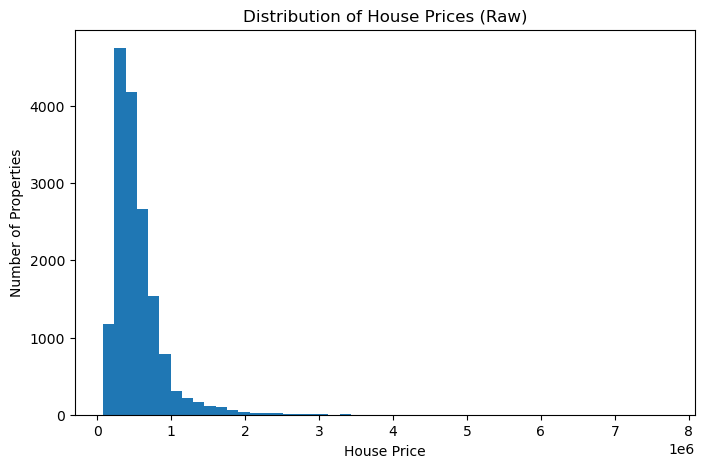

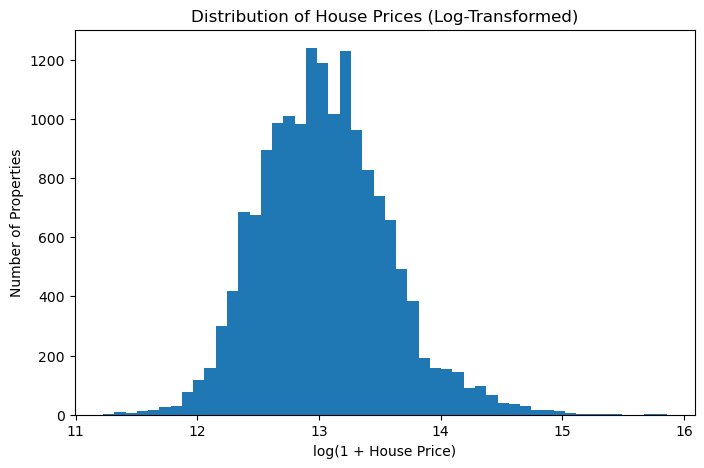

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Raw price distribution
plt.figure(figsize=(8, 5))
plt.hist(train["price"], bins=50)
plt.xlabel("House Price")
plt.ylabel("Number of Properties")
plt.title("Distribution of House Prices (Raw)")
plt.show()

# Log-transformed price distribution
plt.figure(figsize=(8, 5))
plt.hist(np.log1p(train["price"]), bins=50)
plt.xlabel("log(1 + House Price)")
plt.ylabel("Number of Properties")
plt.title("Distribution of House Prices (Log-Transformed)")
plt.show()

In [4]:
features = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "lat",
    "long"
]

X = train[features]
y = np.log1p(train["price"])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

preds = model.predict(X_val)

mse  = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
r2   = r2_score(y_val, preds)

rmse, r2

(np.float64(0.20727843576270516), 0.8443059422235368)

In [19]:
train_image_dir = "data/images/train/"
test_image_dir = "data/images/test/"

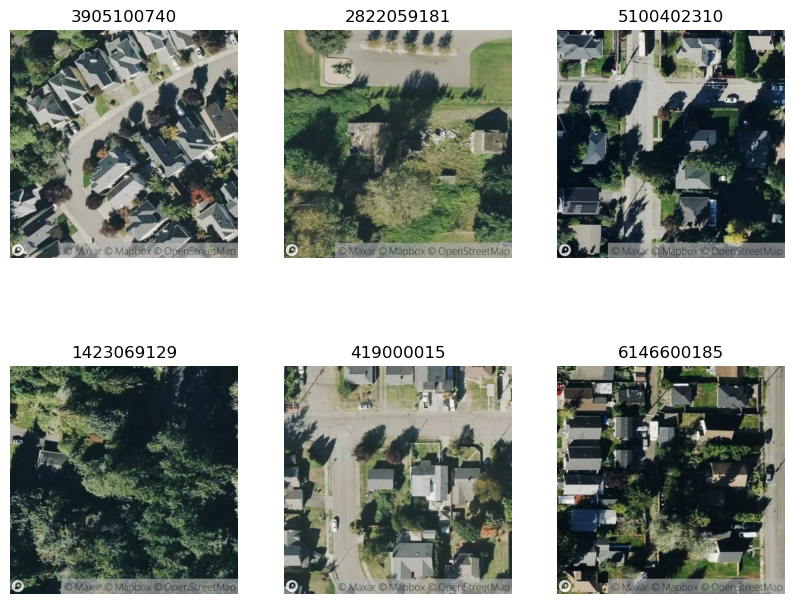

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd

train = pd.read_csv(train_path)
train_image_dir = "data/images/train/"

available_ids = [f.split(".")[0] for f in os.listdir(train_image_dir)]
sample_ids = pd.Series(available_ids).sample(6).values

plt.figure(figsize=(10,8))
for i,pid in enumerate(sample_ids):
    path = os.path.join(train_image_dir, f"{pid}.png")
    img = Image.open(path)
    
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(pid)

plt.show()